In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X, Y = gaussian_quantiles
Y = Y.reshape(-1,1)

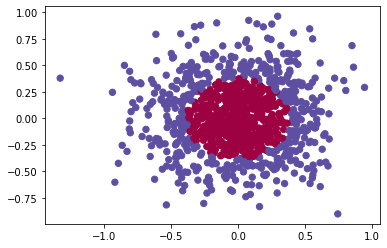

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

### Función de Activación

In [26]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

### Función de Pérdida

In [27]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [34]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [20]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)
params

{'W1': array([[-0.53328648,  0.69916305, -0.28941287,  0.8013578 ],
        [ 0.47896529, -0.83325042,  0.04529036,  0.73221488]]),
 'b1': array([[0.32245049, 0.34121071, 0.99207873, 0.81599807]]),
 'W2': array([[-0.1480541 , -0.12329335, -0.31235579,  0.62334648,  0.88976753,
         -0.09197729, -0.98083376, -0.49860051],
        [ 0.77860806,  0.93408114,  0.68381018, -0.88529482, -0.36290494,
         -0.31127415, -0.82800584,  0.46260715],
        [ 0.27525808,  0.25993272,  0.84800601, -0.48674891, -0.81871293,
         -0.72346487, -0.74957253,  0.4366721 ],
        [ 0.58878587, -0.57730747,  0.94062835, -0.03280068, -0.70110473,
         -0.21580409,  0.76973394,  0.01093121]]),
 'b2': array([[-0.73411123,  0.71712784, -0.71696068,  0.83083494, -0.90699285,
          0.05940353,  0.21150269,  0.02869539]]),
 'W3': array([[-0.22919525],
        [ 0.41565819],
        [ 0.15564837],
        [ 0.0828169 ],
        [-0.60574491],
        [ 0.19486213],
        [ 0.68208125],
    

In [21]:
params['W1'].shape

(2, 4)

In [22]:
np.matmul(X, params['W1']).shape

(1000, 4)

In [23]:
X@params['W1']

array([[-0.54589101,  0.80030224, -0.20779083,  0.22189569],
       [ 0.0843868 , -0.09066857,  0.06667095, -0.26801133],
       [-0.37073484,  0.57594134, -0.10721725, -0.07862645],
       ...,
       [ 0.13598187, -0.27545454, -0.02779889,  0.4829059 ],
       [-0.145611  ,  0.20861512, -0.06050462,  0.09354176],
       [-0.35379906,  0.54926211, -0.10270548, -0.07242297]])

In [24]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

In [25]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.2549841234704708
0.4077549847401128
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1665078405.py:5: RuntimeWarning: overflow encountered in exp
  else: return 1 / (1 + np.exp(a))
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1863239292.py:12: RuntimeWarning: overflow encountered in matmul
  params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1863239292.py:9: RuntimeWarning: overflow encountered in matmul
  params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1863239292.py:21: RuntimeWarning: invalid value encountered in matmul
  params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1863239292.py:24: RuntimeWarning: overflow encountered in matmul
  params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
C:\Users\Cesar\AppData\Local\Temp\ipykernel_4456\1863239292.py:26: RuntimeWarning: overflow encountered in matmul
  params['dZ1'] = np.matmul

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
